In [ ]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from fe_gmx import AWH_Ensemble, AWH_2D_Ensemble

In [2]:
#awh_ensemble = AWH_2D_Ensemble('../AWH_2D_PORE_ANGLE', regenerate_awh=True)
#awh_ensemble = AWH_2D_Ensemble('../AWH_2D_PORE_LOOPC', regenerate_awh=True)
#awh_ensemble = AWH_2D_Ensemble('/nethome/sbergt/EPJ_WT/AWH_PORE_LOOPC', regenerate_awh=True)
awh_ensemble = AWH_2D_Ensemble('/nethome/sbergt/BFE_nachrs/EPJ/S108C/AWH_S108C_PORE_LOOPC', regenerate_awh=True)

         Creating a tmp folder tmp.


                        :-) GROMACS - gmx awh, 2023 (-:

Executable:   /opt/tcbsys/gromacs/2023/gmx/AVX2_256/bin/gmx
Data prefix:  /opt/tcbsys/gromacs/2023/gmx/AVX2_256
Working dir:  /nethome/yzhuang/cephfs/nachrs_modulator/AWH_2D/test/ANALYSIS/tmp/awh_result
Command line:
  gmx awh -f /nethome/sbergt/EPJ_WT/AWH_PORE_LOOPC/rep1/awh.edr -o awh.xvg -s /nethome/sbergt/EPJ_WT/AWH_PORE_LOOPC/rep1/awh.tpr -skip 10 -more

Opened /nethome/sbergt/EPJ_WT/AWH_PORE_LOOPC/rep1/awh.edr as single precision energy file
Reading file /nethome/sbergt/EPJ_WT/AWH_PORE_LOOPC/rep1/awh.tpr, VERSION 2023.1 (single precision)
Last energy frame read 3361 time 336100.000         

GROMACS reminds you: "... an excellent man, almost worthy of such a wife ..." (Jane Eyre in Jane Eyre by Charlotte Bronte)



Found 169 awh_pmf files.
The latest awh_pmf file is tmp/awh_result/awh_t336000.xvg
The latest awh_pmf file was generated at 2023-07-21 10:31:44.104437
Found 8 walkers.
The latest walker was generated at 2023-07-21 11:04:25.864132
Generating pulling data...
Generating log data...
Generating PMF data...


Generating PMF data: 100%|██████████| 169/169 [00:05<00:00, 29.99it/s]


In [3]:
awh_ensemble.awh_log[0]

AWH_LOG(filename=/nethome/sbergt/EPJ_WT/AWH_PORE_LOOPC/rep1/awh.log, index=0), covering_times=[19696, 47296, 107152, 198608], equlibrated_histogram_time=19696, out_of_initial_stage_time=None

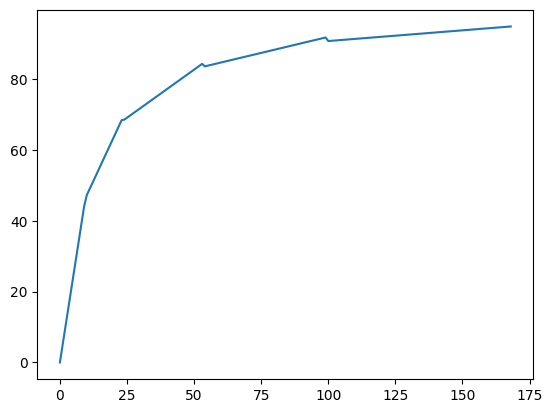

In [4]:
plt.plot(awh_ensemble.sample_weights)

In [5]:
awh_pmf = awh_ensemble.awh_results.pmf[-1]

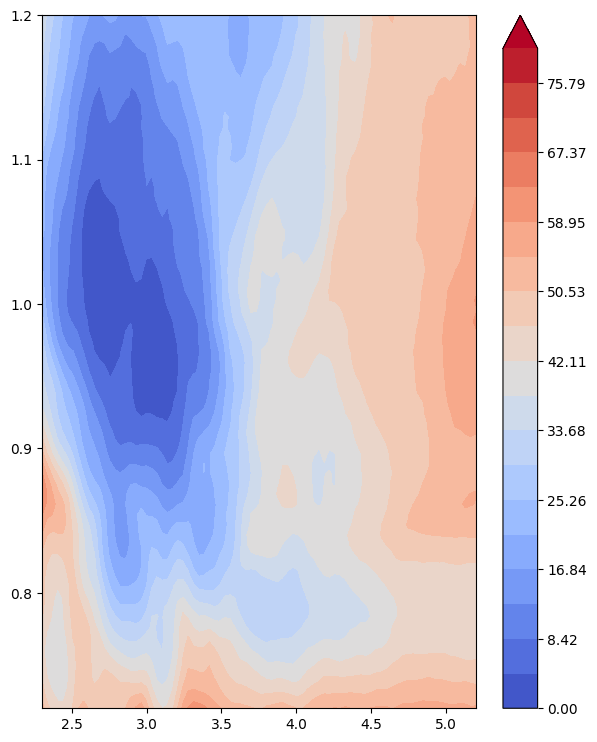

In [6]:
awh_cv1 = awh_pmf.T[0][0]
awh_cv2 = awh_pmf[0].T[1]
awh_fes = awh_pmf[:,:,2].T

fig, ax = plt.subplots(figsize=(7,9))

levels=np.linspace(0, 80, 20)
mappable = ax.contourf(
            awh_cv1,
            awh_cv2,
            awh_fes,
            vmax=levels.max(),
            levels=levels,
            extend='max',
            cmap='coolwarm')
plt.colorbar(mappable)

NameError: name 'awh_ensemble' is not defined

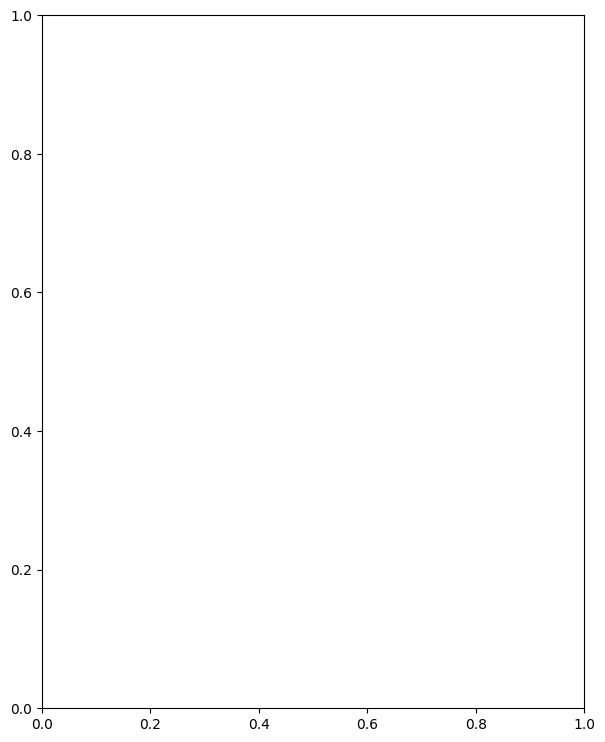

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("Reds")
kT = 2.494339
fig, ax = plt.subplots(figsize=(7,9))

for time, awh_pmf in zip(awh_ensemble.awh_results.timeseries[-30::6],
                         awh_ensemble.awh_results.pmf[-30::6]):
    print(time)

    awh_cv1 = awh_pmf.T[0][0]
    awh_cv2 = awh_pmf[0].T[1]
    awh_fes = awh_pmf[:,:,2].T

    # integral over CV2
    awh_fes_int = np.zeros((awh_fes.shape[1]))

    for i in range(awh_fes.shape[1]):
        awh_fes_int[i] = np.trapz(np.exp(-awh_fes[:, i] / kT), awh_cv2)
    awh_fes_int = -np.log(awh_fes_int) * kT


    ax.plot(awh_cv1, awh_fes_int, lw=3, label=time)

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax.set_ylabel('PMF (kJ/mol)')
ax.set_xlabel('dist (nm)')
plt.show()

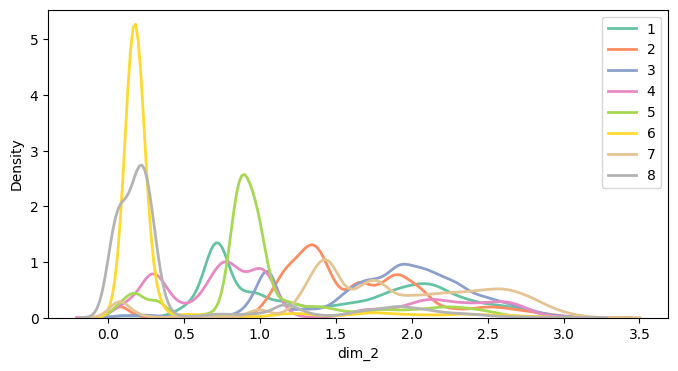

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('Set2')
fig, ax = plt.subplots(figsize=(8,4))

for awh_pullx in awh_ensemble.awh_pullx:
    sns.kdeplot(x='dim_2', data=awh_pullx.data, label=awh_pullx.index, linewidth=2, ax=ax)
plt.legend()

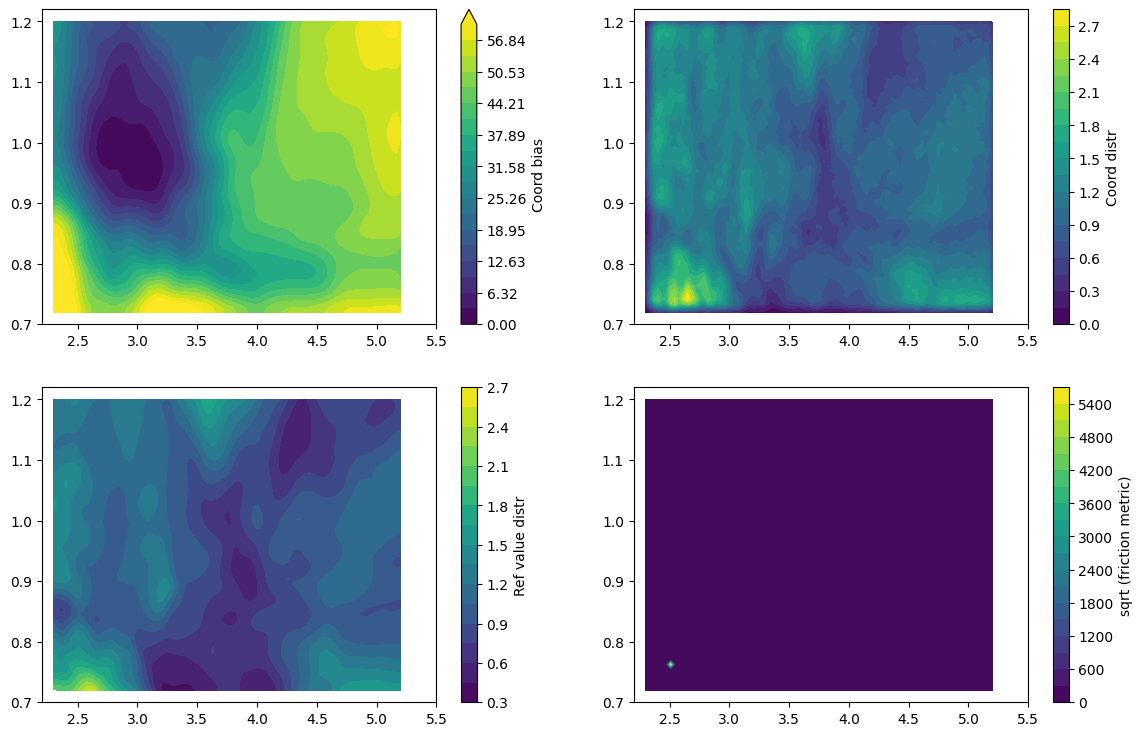

In [16]:
fig, axes = plt.subplots(2,2, figsize=(14,9))
awh_cv1 = awh_pmf.T[0][0]
awh_cv2 = awh_pmf[0].T[1]
awh_fes = awh_pmf[:,:,3].T
levels=np.linspace(0, 60, 20)
mappable = axes[0][0].contourf(
            awh_cv1,
            awh_cv2,
            awh_fes,
            vmax=60,
            levels=levels,
            extend='max',
            alpha=1)
plt.colorbar(mappable, label='Coord bias')

awh_fes = awh_pmf[:,:,4].T
mappable = axes[0][1].contourf(
            awh_cv1,
            awh_cv2,
            awh_fes,
            levels=20,
            alpha=1)
plt.colorbar(mappable, label='Coord distr')

awh_fes = awh_pmf[:,:,5].T
mappable = axes[1][0].contourf(
            awh_cv1,
            awh_cv2,
            awh_fes,
            levels=20,
            alpha=1)
plt.colorbar(mappable, label='Ref value distr')

awh_fes = awh_pmf[:,:,7].T
mappable = axes[1][1].contourf(
            awh_cv1,
            awh_cv2,
            awh_fes,
            levels=20,
            alpha=1)
plt.colorbar(mappable, label='sqrt (friction metric)')

for ax in axes.flatten():
    ax.set_xlim(2.2, 5.5)
    ax.set_ylim(0.7, 1.22)

In [8]:
# get absolute binding free energy

def get_binding_kinectics(r,
                          pmf,
                          binding_range,
                          ax,
                          r_star_ind=-10,
                          temperature=300,
                          printing=False):
    """
    K_eq = pi * integral_in_binding_site(exp(-beta * w(r)) dr)
    dG = -RT * ln(K_eq / 1661)
    Parameters
    ----------
    r: np.ndarray
        The distance in Å.
    pmf : np.ndarray
        The PMF in kJ/mol.
    binding_range : tuple
        The binding region in Å.
    ax : matplotlib.axes.Axes
        The axes to plot on.
    r_star_ind : int, optional, default=-10
        The index of the r*.
        r* is the unbound area.
        W(r*) = −kT ln(α r * 2) must hold,
        α is a constant.
    temperature : float, optional, default=300
        The temperature in Kelvin.
    printing : bool, optional, default=False
        If True, print the results.
    """
    kT = 0.00831446261815324 * temperature
    beta = 1 / kT
    r_start = r[r_star_ind]
    w_r = pmf - pmf[r_star_ind]
    # get the binding region
    binding_region = np.where((r > binding_range[0]) & (r < binding_range[1]))

    ax.plot(r, w_r, c='black')
    ax.plot(r[r_star_ind], w_r[r_star_ind], 'o', c='red')

    r_binding = r[binding_region][1:]
    w_r_binding = w_r[binding_region][1:]
    ax.plot(r_binding, w_r_binding, c='red')
    k_eq = 2 * np.pi * r_start * 20 / 5
    k_eq = k_eq * np.trapz(np.exp(-beta * w_r_binding), r_binding)
    dG_bind = -kT * np.log(k_eq / 1661.)
    if printing:
        print(f'r* = {r_start} Å')
        print(f'K_eq = {k_eq}')
        print(f'dG_bind = {dG_bind} kJ/mol')
        print(f'dG_bind = {dG_bind / 4.194} kcal/mol')

    return k_eq, dG_bind

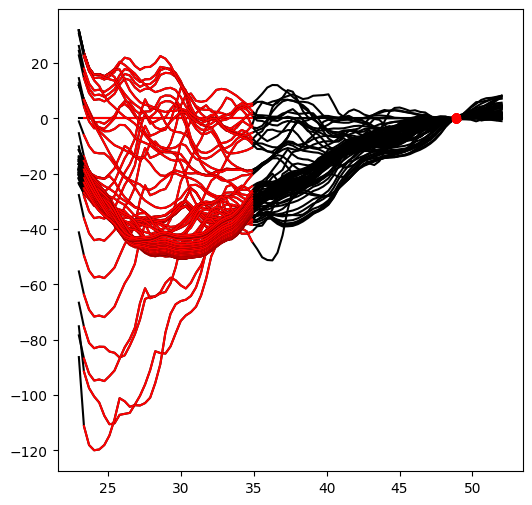

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("Reds", n_colors=10)
fig, ax = plt.subplots(figsize=(6,6), sharey=True)
binding_fes = []
for time, awh_pmf in zip(awh_ensemble.awh_results.timeseries[::2],
                            awh_ensemble.awh_results.pmf[::2],
                            ):
    sel_lambda = 0

    awh_cv1 = awh_pmf.T[0][0]
    awh_cv2 = awh_pmf[0].T[1]
    awh_fes = awh_pmf[:,:,2].T

    # integral over CV2
    awh_fes_int = np.zeros((awh_fes.shape[1]))

    for i in range(awh_fes.shape[1]):
        awh_fes_int[i] = np.trapz(np.exp(-awh_fes[:, i] / kT), awh_cv2)
    awh_fes_int = -np.log(awh_fes_int) * kT
    awh_r = awh_cv1

    k_eq, dG_bind = get_binding_kinectics(awh_r * 10,
                                                    awh_fes_int,
                                                    ax=ax,
                                                    binding_range=(20,35))
    binding_fes.append([eval(time[1:]), dG_bind])
plt.show()

binding_fes = np.array(binding_fes)

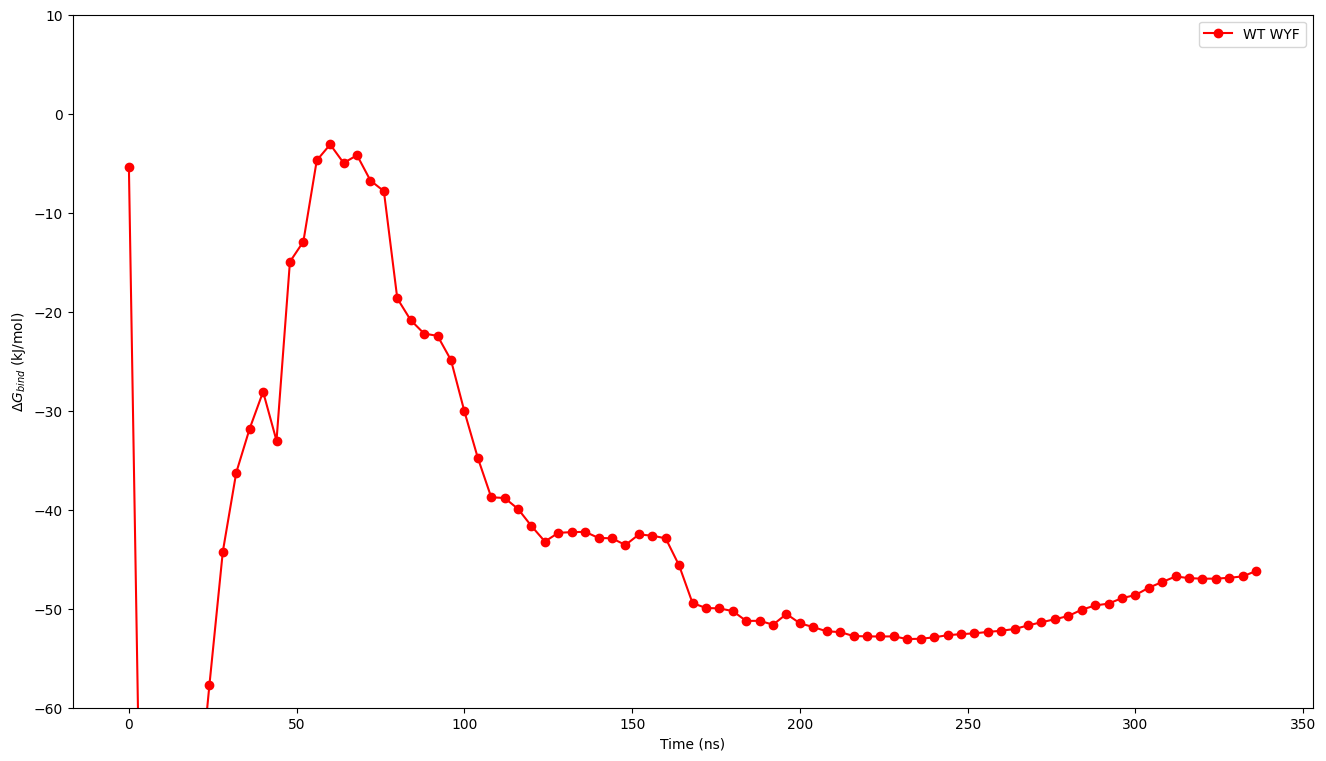

In [10]:
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(binding_fes.T[0] / 1000, binding_fes.T[1], 'o-', label='WT WYF',
        color='red'
        )
o_e_t = awh_ensemble.awh_log[0].out_of_initial_stage_time
if o_e_t is not None:
    ax.axvline(o_e_t/1000, color='red', linestyle='--', label=f'out of initial stage')
ax.set_ylabel(r'$\Delta G_{bind}$ (kJ/mol)')
ax.set_xlabel('Time (ns)')
ax.set_ylim(-60, 10)

ax.legend(bbox_to_anchor=(1,1))